In [ ]:
!pip install numpy pandas

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
#1. Loading and Initial Exploration

file_path = '/content/circuits.csv'
df = pd.read_csv(file_path)

# Display the first few rows and summary statistics
print(df.head())
print(df.describe())
print(df.info())

   circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  26.03250   50.51060    7   
3      Spain  41.57000    2.26111  109   
4     Turkey  40.95170   29.40500  130   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
4         http://en.w

In [ ]:
#2. Data Cleaning and Preparation

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values if necessary
df = df.dropna()

# Convert data types if needed (e.g., 'lat', 'lng', 'alt' to float)
df[['lat', 'lng', 'alt']] = df[['lat', 'lng', 'alt']].astype(float)

circuitId     0
circuitRef    0
name          0
location      0
country       0
lat           0
lng           0
alt           0
url           0
dtype: int64


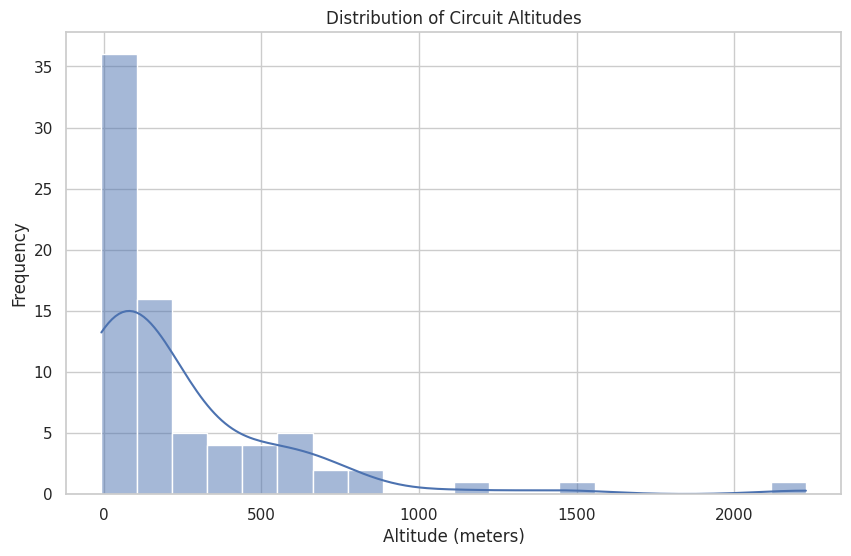

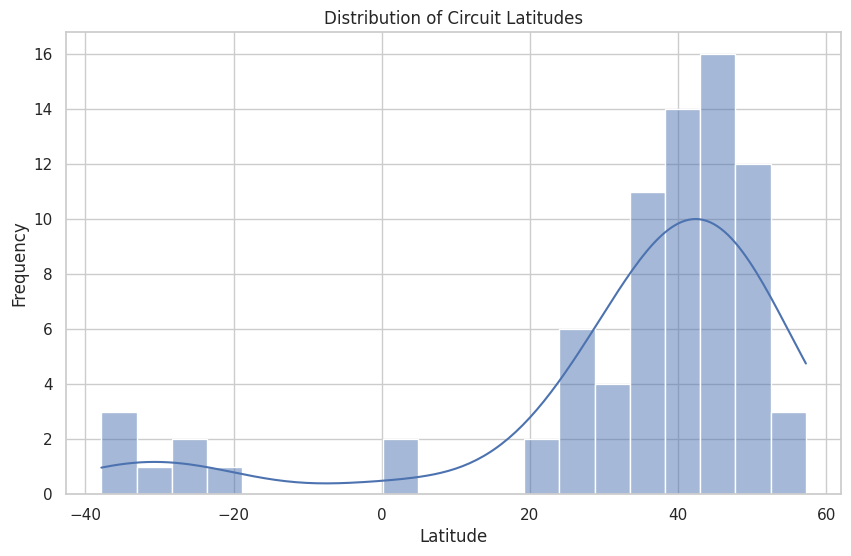

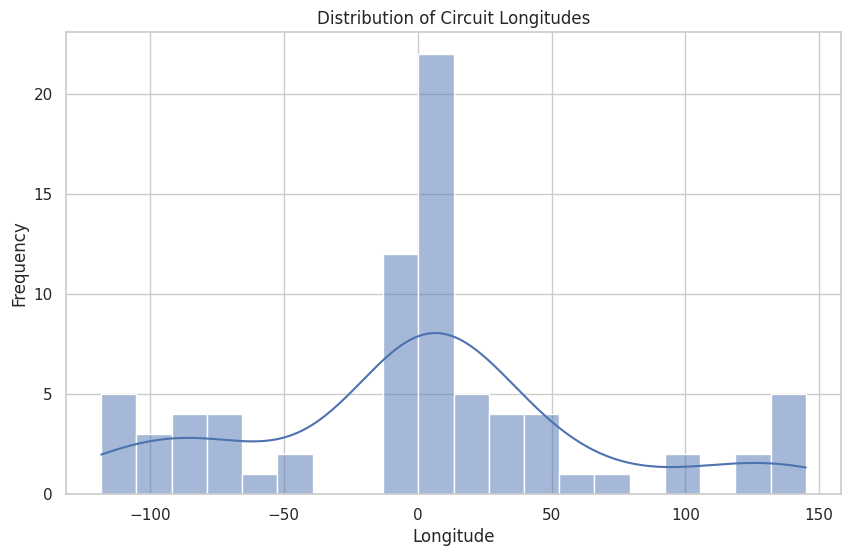

In [ ]:
#3. Visualizations
#3.1 Basic Statistical Plots

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visual aesthetics
sns.set(style="whitegrid")

# Plot the distribution of altitudes
plt.figure(figsize=(10, 6))
sns.histplot(df['alt'], bins=20, kde=True)
plt.title('Distribution of Circuit Altitudes')
plt.xlabel('Altitude (meters)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of latitudes
plt.figure(figsize=(10, 6))
sns.histplot(df['lat'], bins=20, kde=True)
plt.title('Distribution of Circuit Latitudes')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of longitudes
plt.figure(figsize=(10, 6))
sns.histplot(df['lng'], bins=20, kde=True)
plt.title('Distribution of Circuit Longitudes')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.show()

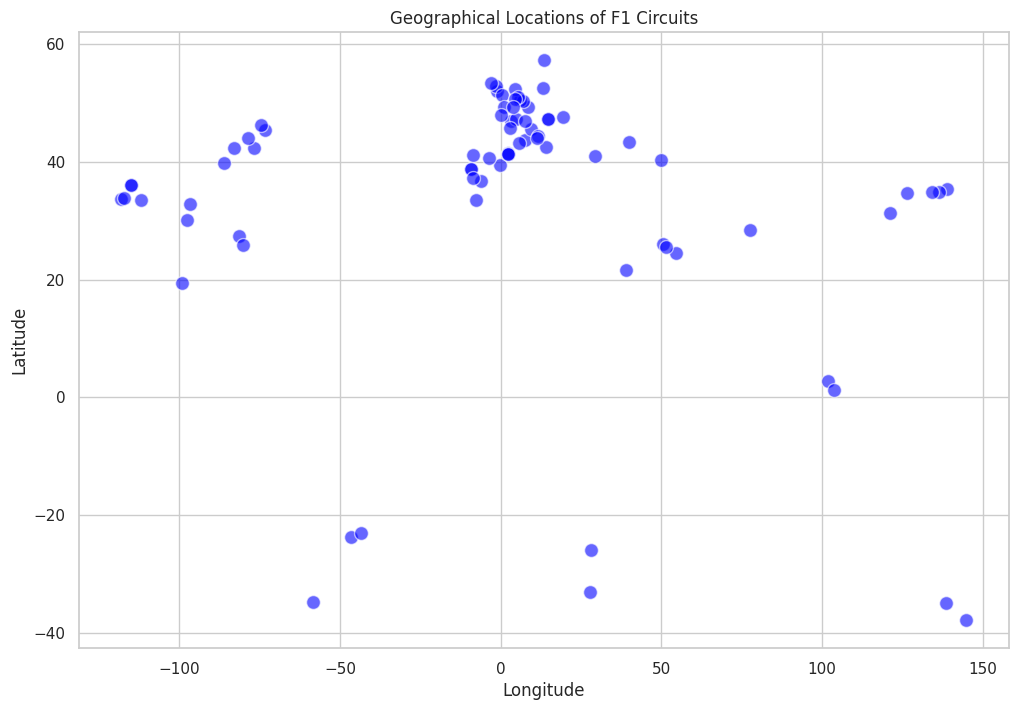

In [ ]:
#3.2 Geospatial Plots

# Scatter plot of circuits' geographical locations
plt.figure(figsize=(12, 8))
plt.scatter(df['lng'], df['lat'], c='blue', alpha=0.6, edgecolors='w', s=100)
plt.title('Geographical Locations of F1 Circuits')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [ ]:
#3.2.1 Advanced Geospatial Plot with Interactive Map

import pandas as pd
import folium
from folium import plugins

# Load the dataset
file_path = '/content/circuits.csv'
df = pd.read_csv(file_path)

# Initialize the map centered around the average location
map_center = [df['lat'].mean(), df['lng'].mean()]
f1_map = folium.Map(location=map_center, zoom_start=2, control_scale=True)

# Add markers for each circuit with popups
for i, row in df.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=folium.Popup(f"<b>{row['name']}</b><br>Country: {row['country']}<br><a href='{row['url']}' target='_blank'>More Info</a>", max_width=300),
         icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(f1_map)

# Add a heatmap layer
heat_data = [[row['lat'], row['lng']] for i, row in df.iterrows()]
plugins.HeatMap(heat_data, min_opacity=0.2, radius=10).add_to(f1_map)

# Save map to HTML
f1_map.save('f1_geospatial_map.html')

# Display the map in a notebook environment
from IPython.display import IFrame
IFrame('f1_geospatial_map.html', width=800, height=600)

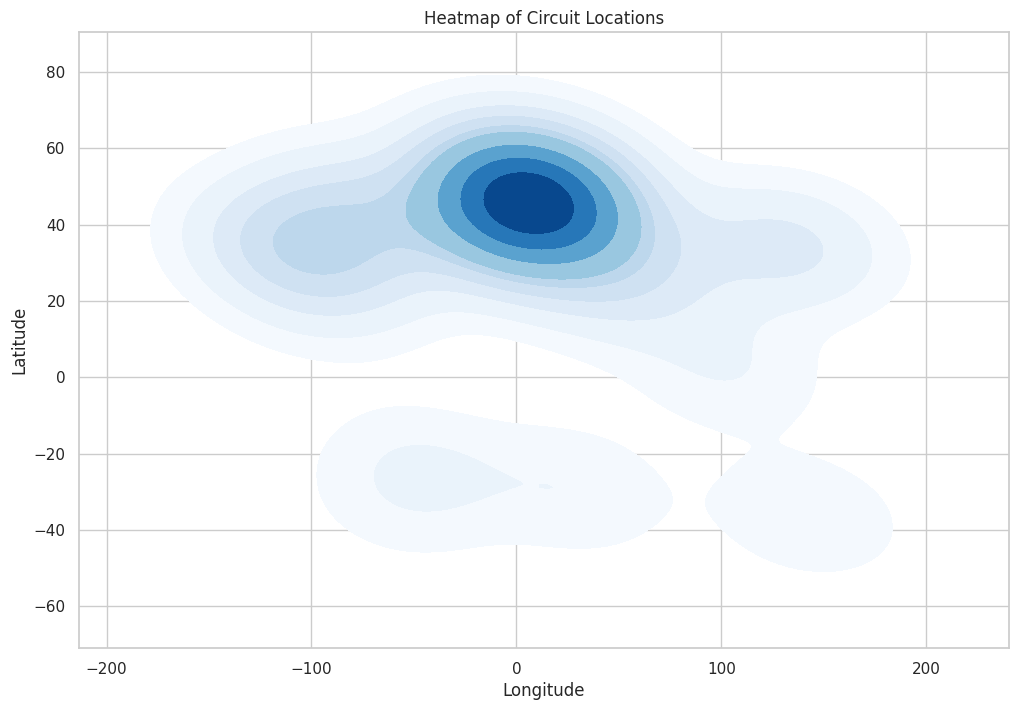

In [ ]:
#3.3 Heatmap of Circuit Locations

# Plotting a heatmap of circuit locations
plt.figure(figsize=(12, 8))
sns.kdeplot(x=df['lng'], y=df['lat'], cmap="Blues", fill=True)
plt.title('Heatmap of Circuit Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

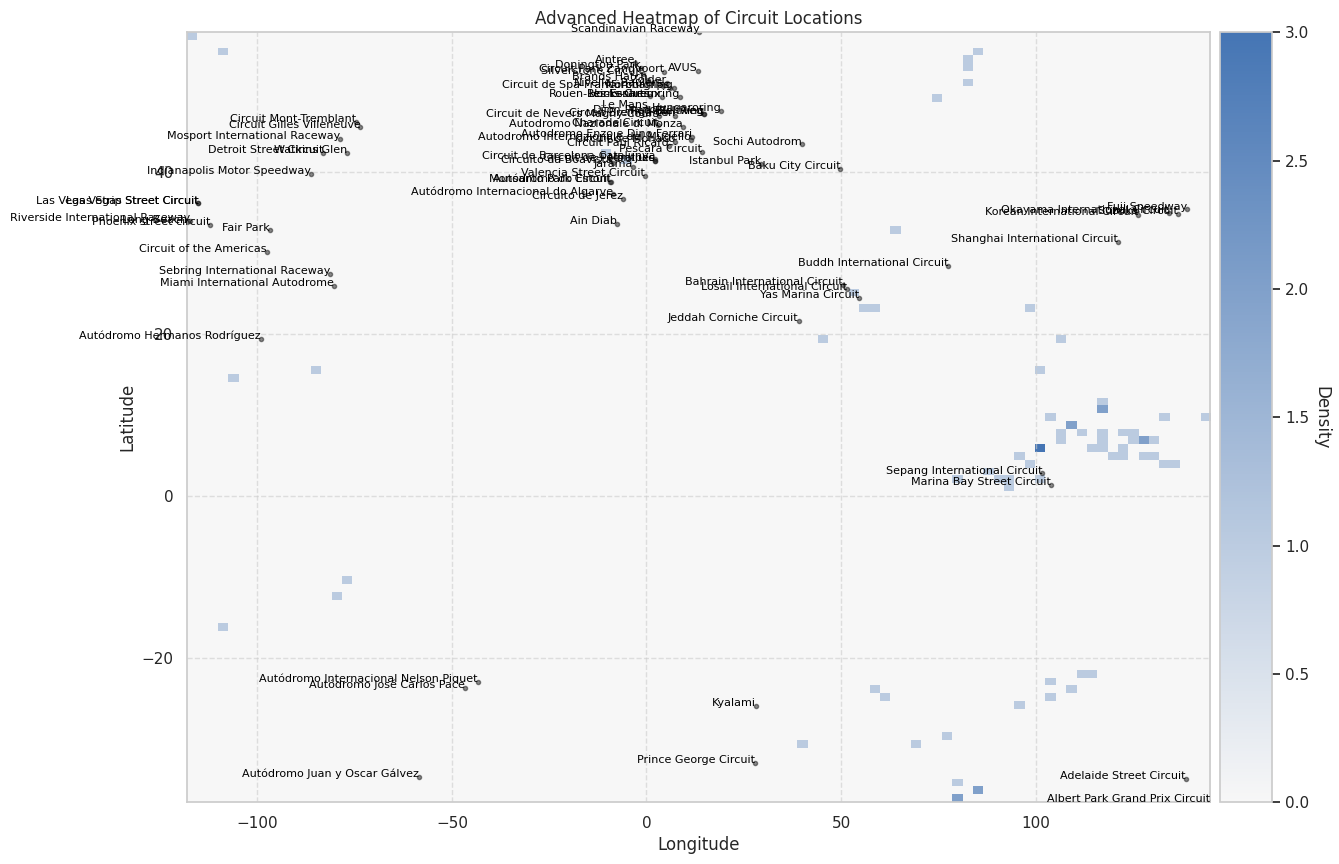

In [ ]:
#3.3.1 Advanced Heatmap with Labeled Locations

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the dataset
file_path = '/content/circuits.csv'
df = pd.read_csv(file_path)

# Create a custom color map for the heatmap
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#f7f7f7', '#4575b4'], N=256)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(14, 10))
# Create a grid for the heatmap
lat_bins = np.linspace(df['lat'].min(), df['lat'].max(), 100)
lng_bins = np.linspace(df['lng'].min(), df['lng'].max(), 100)
lat_lng_hist, lat_edges, lng_edges = np.histogram2d(df['lat'], df['lng'], bins=[lat_bins, lng_bins])

# Generate the heatmap
cax = ax.imshow(lat_lng_hist.T, interpolation='nearest', cmap=cmap, origin='lower',
                 extent=[lng_edges[0], lng_edges[-1], lat_edges[0], lat_edges[-1]], aspect='auto')

# Add a colorbar with labels
divider = make_axes_locatable(ax)
cax_cb = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(cax, cax=cax_cb)
cbar.set_label('Density', rotation=270, labelpad=15)

# Add labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Advanced Heatmap of Circuit Locations')

# Add grid lines for better readability
ax.grid(True, linestyle='--', alpha=0.6)

# Annotate top locations
for i, row in df.iterrows():
    ax.plot(row['lng'], row['lat'], 'ko', markersize=3, alpha=0.5)
    ax.text(row['lng'], row['lat'], row['name'], fontsize=8, ha='right', color='black')

plt.show()

<ipython-input-13-86f5c22ae8d6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.head(10).index, y=country_counts.head(10).values, palette="viridis")


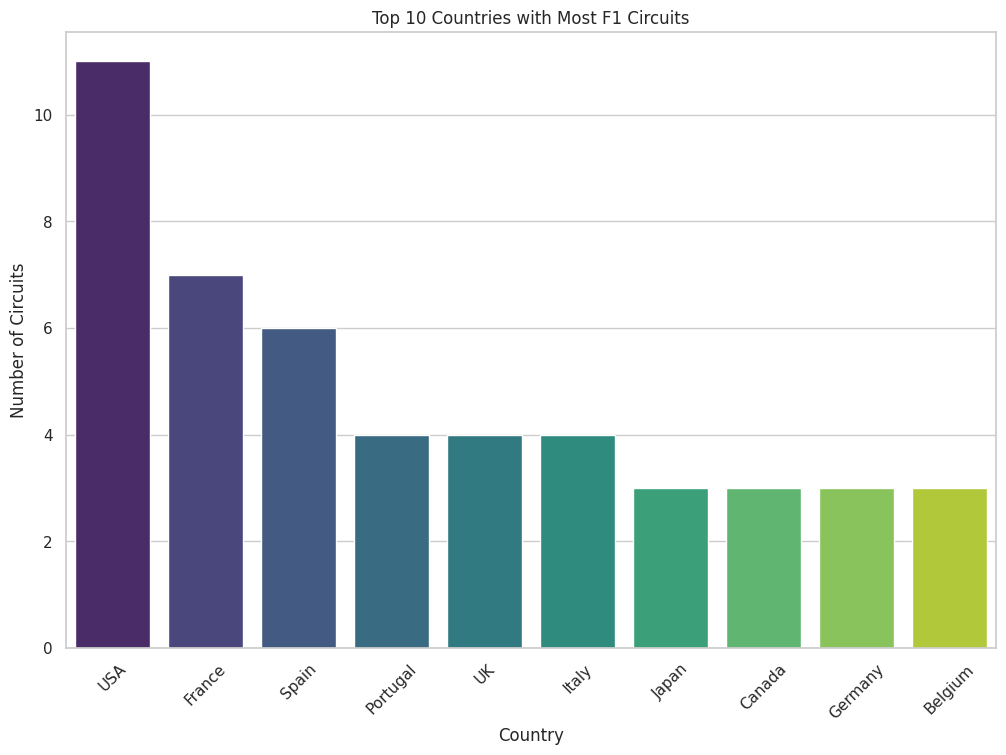

In [ ]:
#3.4 Top 10 Countries with Most Circuits

# Count the number of circuits per country
country_counts = df['country'].value_counts()

# Plot the top 10 countries with the most circuits
plt.figure(figsize=(12, 8))
sns.barplot(x=country_counts.head(10).index, y=country_counts.head(10).values, palette="viridis")
plt.title('Top 10 Countries with Most F1 Circuits')
plt.xlabel('Country')
plt.ylabel('Number of Circuits')
plt.xticks(rotation=45)
plt.show()

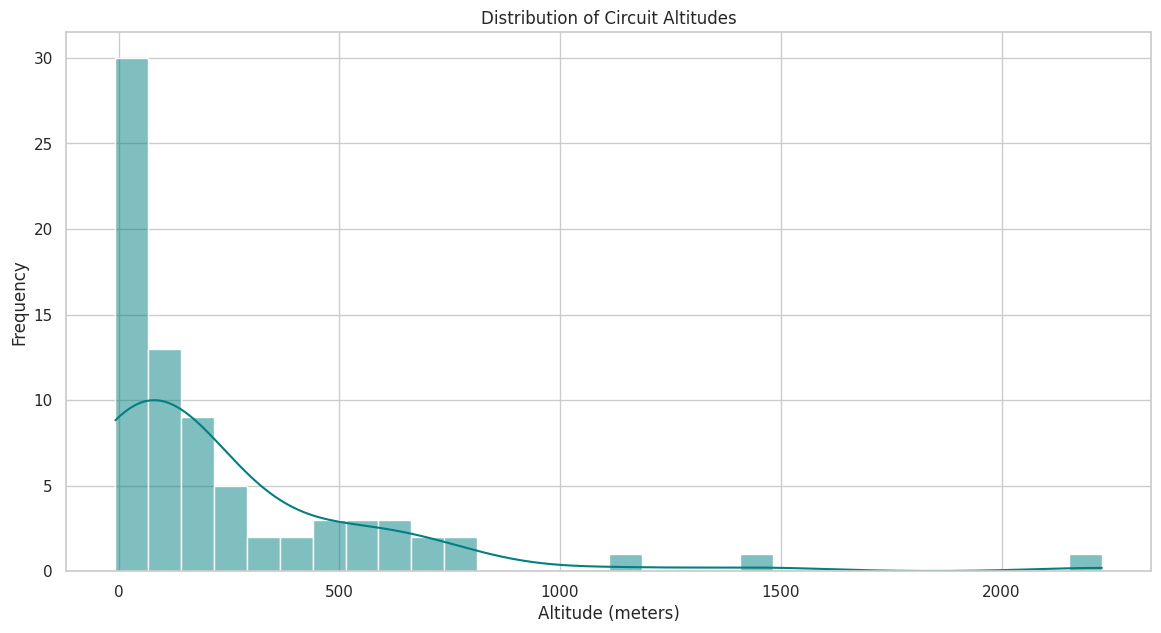

<ipython-input-14-76feecb47c29>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=name_counts.index, y=name_counts.values, palette='viridis')


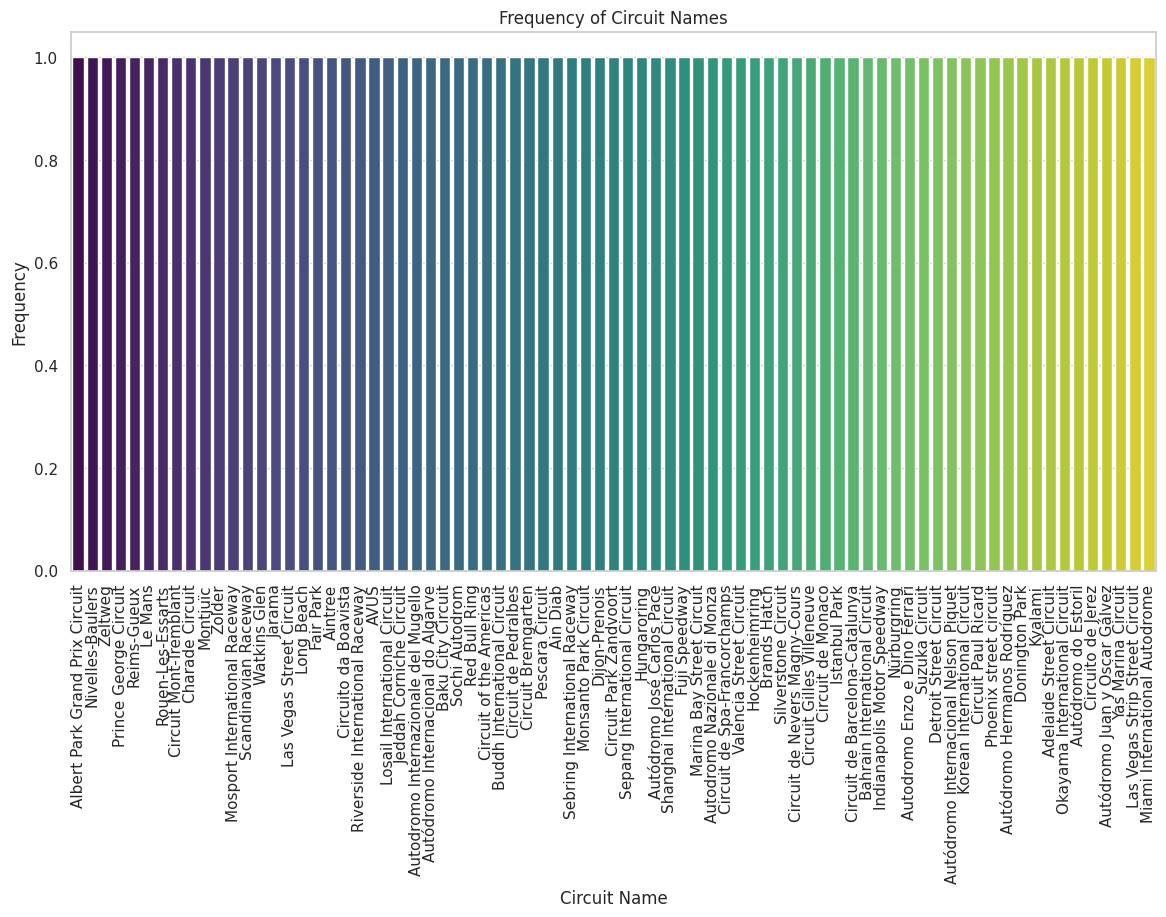

<ipython-input-14-76feecb47c29>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='magma')


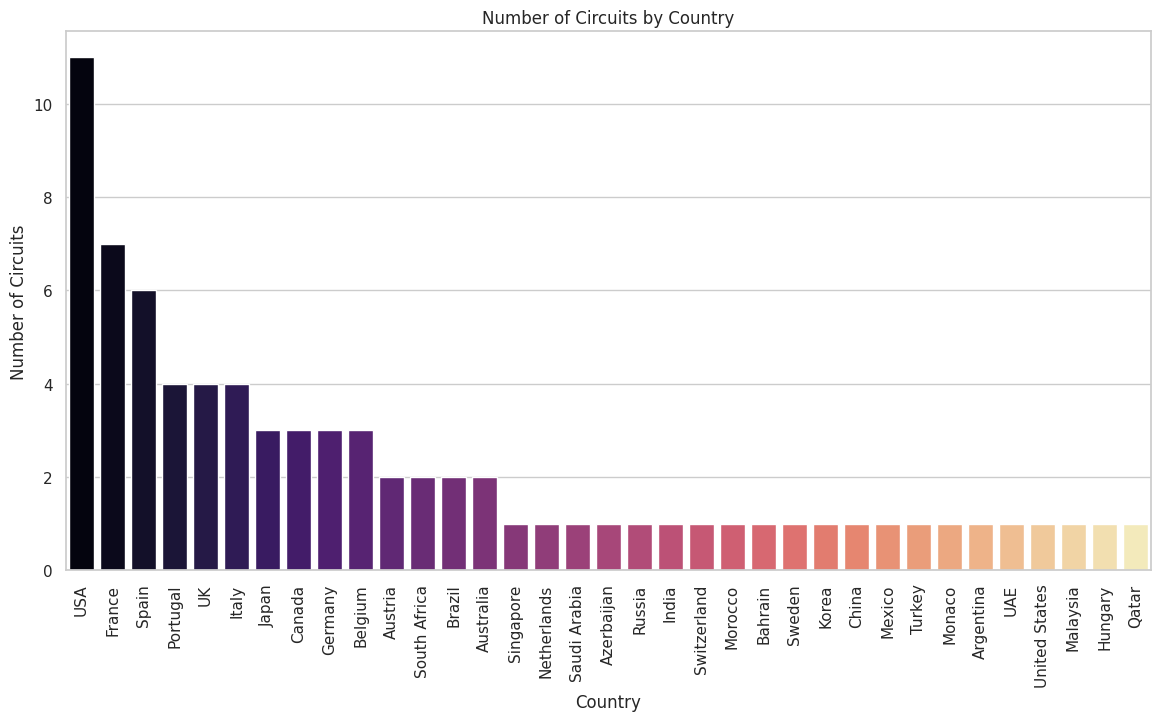

In [ ]:
#4. Exploratory Data Analysis
#4.1 Distribution of Circuit Attributes

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visual aesthetics
sns.set(style="whitegrid")

# Plot the distribution of circuit altitudes
plt.figure(figsize=(14, 7))
sns.histplot(df['alt'], bins=30, kde=True, color='teal')
plt.title('Distribution of Circuit Altitudes')
plt.xlabel('Altitude (meters)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of circuit names
plt.figure(figsize=(14, 7))
name_counts = df['name'].value_counts()
sns.barplot(x=name_counts.index, y=name_counts.values, palette='viridis')
plt.title('Frequency of Circuit Names')
plt.xlabel('Circuit Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of countries with circuit locations
plt.figure(figsize=(14, 7))
country_counts = df['country'].value_counts()
sns.barplot(x=country_counts.index, y=country_counts.values, palette='magma')
plt.title('Number of Circuits by Country')
plt.xlabel('Country')
plt.ylabel('Number of Circuits')
plt.xticks(rotation=90)
plt.show()

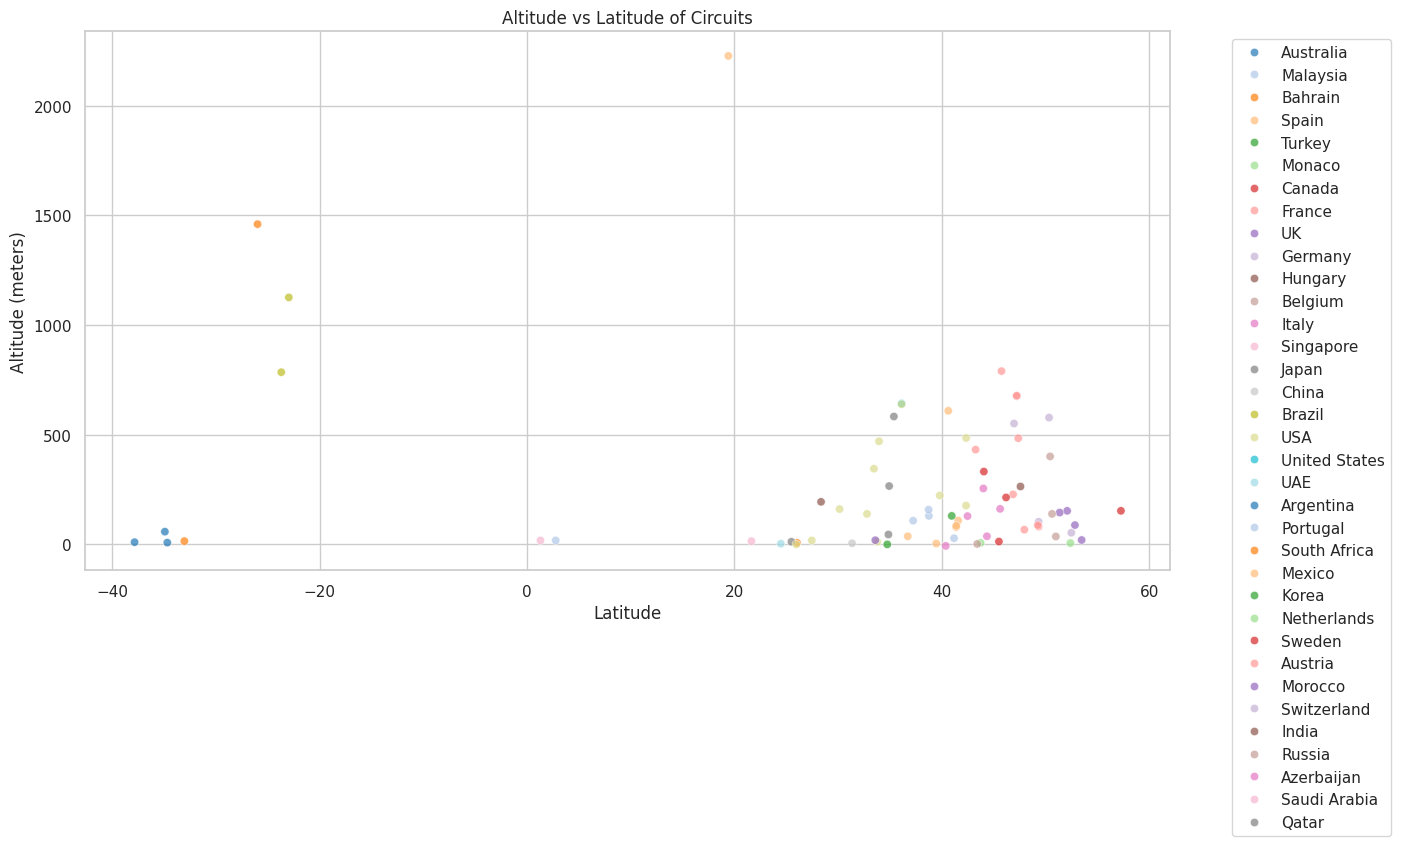

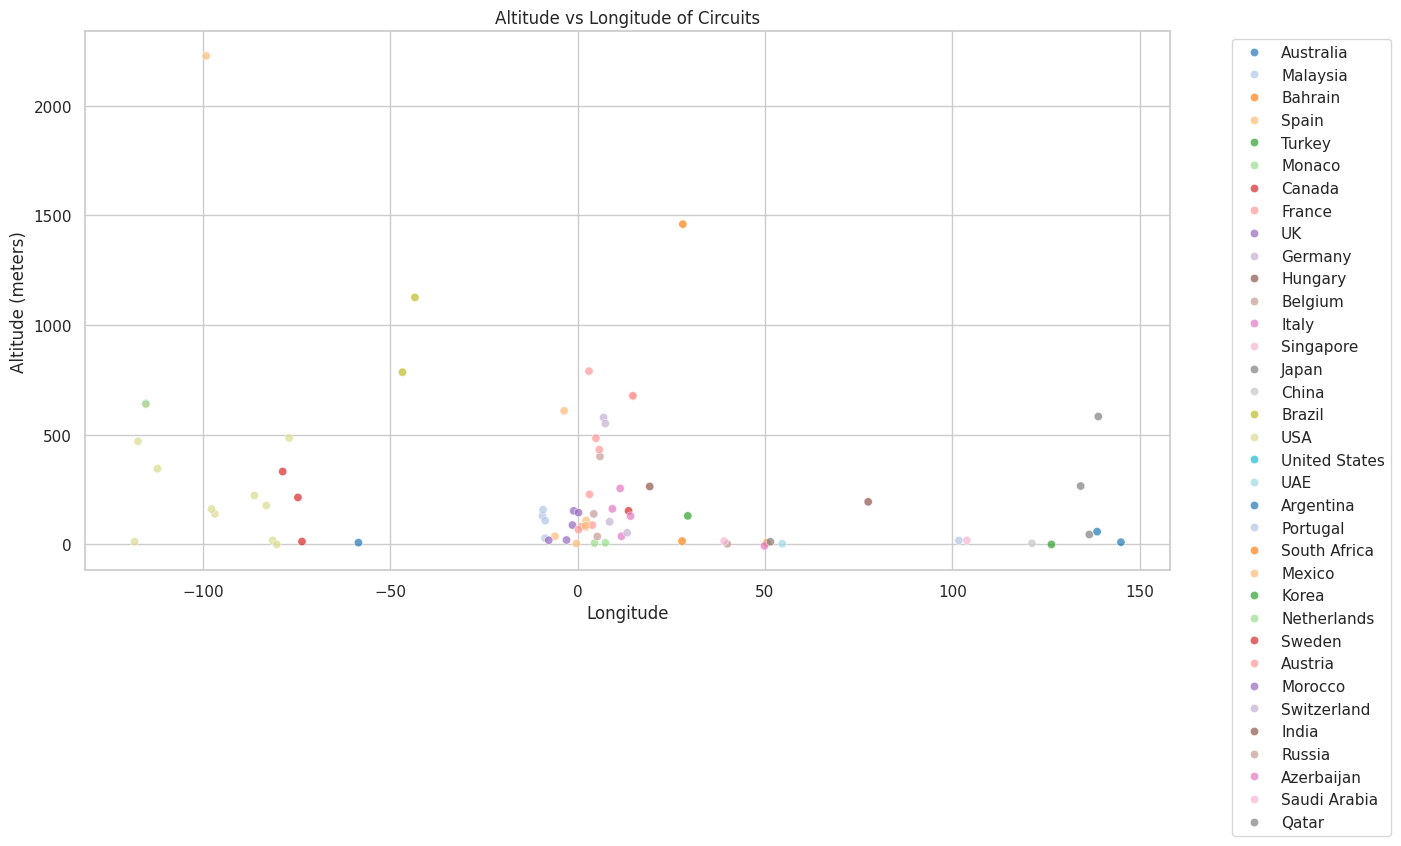

In [ ]:
#4.2 Relationships Between Attributes

# Plot the relationship between altitude and latitude
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='lat', y='alt', hue='country', palette='tab20', alpha=0.7)
plt.title('Altitude vs Latitude of Circuits')
plt.xlabel('Latitude')
plt.ylabel('Altitude (meters)')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.show()

# Plot the relationship between altitude and longitude
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='lng', y='alt', hue='country', palette='tab20', alpha=0.7)
plt.title('Altitude vs Longitude of Circuits')
plt.xlabel('Longitude')
plt.ylabel('Altitude (meters)')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.show()

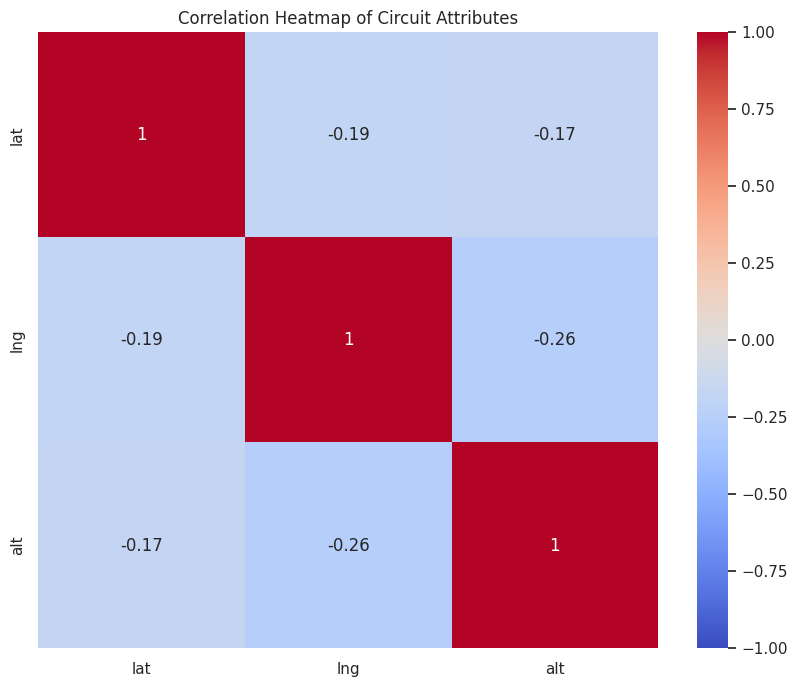

In [ ]:
#4.3 Correlation Analysis

# Compute the correlation matrix
corr = df[['lat', 'lng', 'alt']].corr()

# Plot the heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Circuit Attributes')
plt.show()

The **F1 GrandPrix Dataset** is a meticulously curated collection of data that provides an in-depth look into the world of Formula 1 racing. This dataset encompasses a wide range of information, including circuits, constructors, drivers, race results, lap times, pit stops, and much more.



With over a dozen files, this dataset offers detailed records that are essential for analyzing the performance and standings of drivers and constructors across various seasons. Whether you are a data scientist, sports analyst, or Formula 1 enthusiast, this dataset is designed to help you uncover patterns, trends, and insights in the high-speed world of Formula 1.